In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import contourpy
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from _FigureJiazeHelper import *
from _DetectabilityWithMeta import *
from _CommunityDetect import *
from EXPERIMENT_MINORITY import *
from scipy.optimize import linear_sum_assignment

%load_ext autoreload
%autoreload 2

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


In [2]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=10)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 10  # 'large'
plt.rcParams['lines.markersize'] = 12
plt.rcParams['axes.linewidth'] = 0.5

# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

In [3]:
# For big n
n = 6000
d = 15
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = False
fileID = 'amiExp24.3.28' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

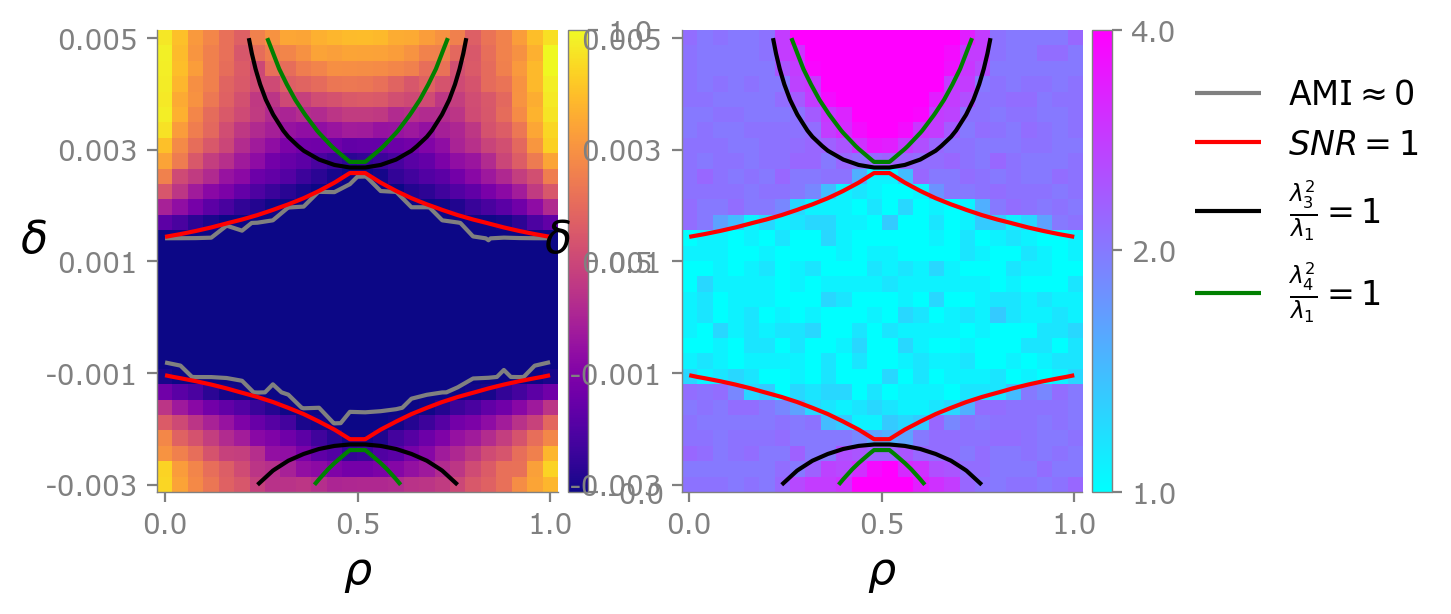

In [6]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)

handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=2, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=4, ytickprecision=3)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
lgd = fig.legend(handels, [r'AMI$\approx$0', r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
# plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# BP

In [4]:
# For big n
n = 6000
d = 15
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
learnqby = 'FE'
fileID = 'amiExp24.3.30' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_learnqby{"MDL" if learnqby == "MDL" else "FE"}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

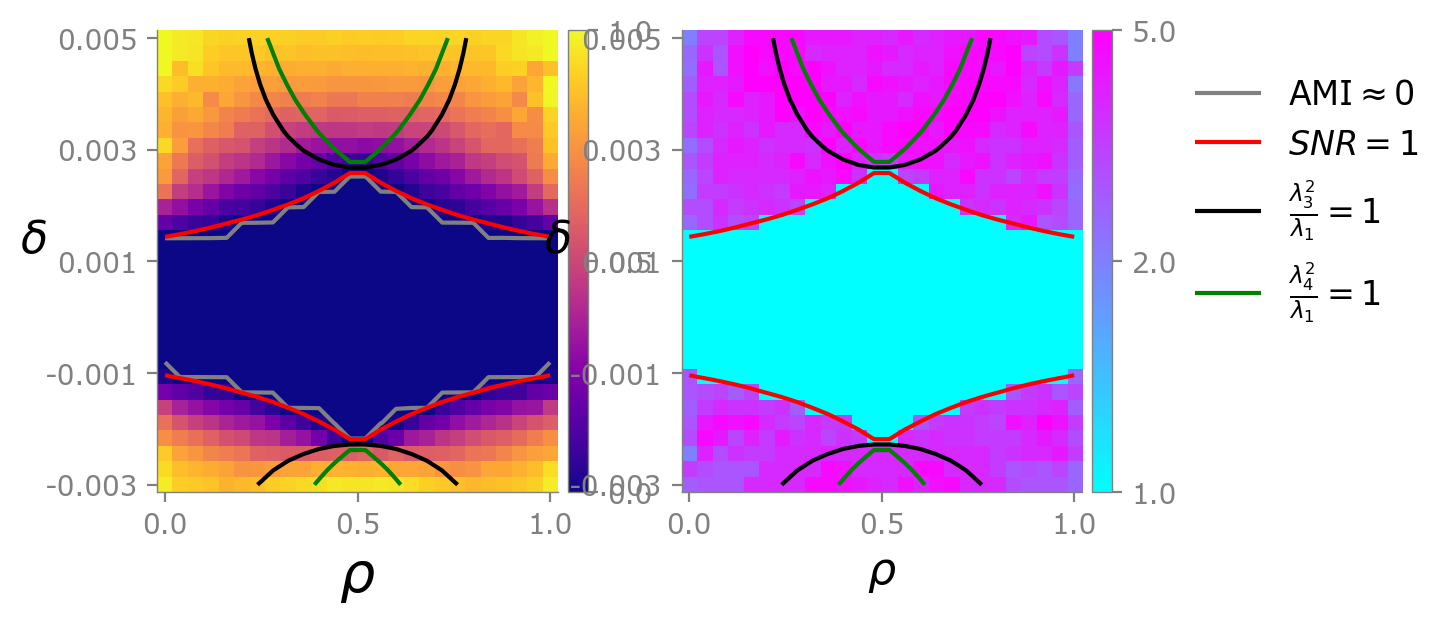

In [11]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)

handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=2, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
lgd = fig.legend(handels, [r'AMI$\approx$0', r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
# plt.subplots_adjust(wspace=0.8)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_" + f'Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# BP 1 delta 0.04 20learn10exp

In [ ]:
# For big n
n = 10000
d = 16
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
learnqby = 'FE'

FileNotFoundError: [Errno 2] No such file or directory: 'n=10000d=16Zs=2Zb=2rho=0.5delta=0.00173_BPlearnq_FreeEnergy_83711SUB_inite0.402934.txt'

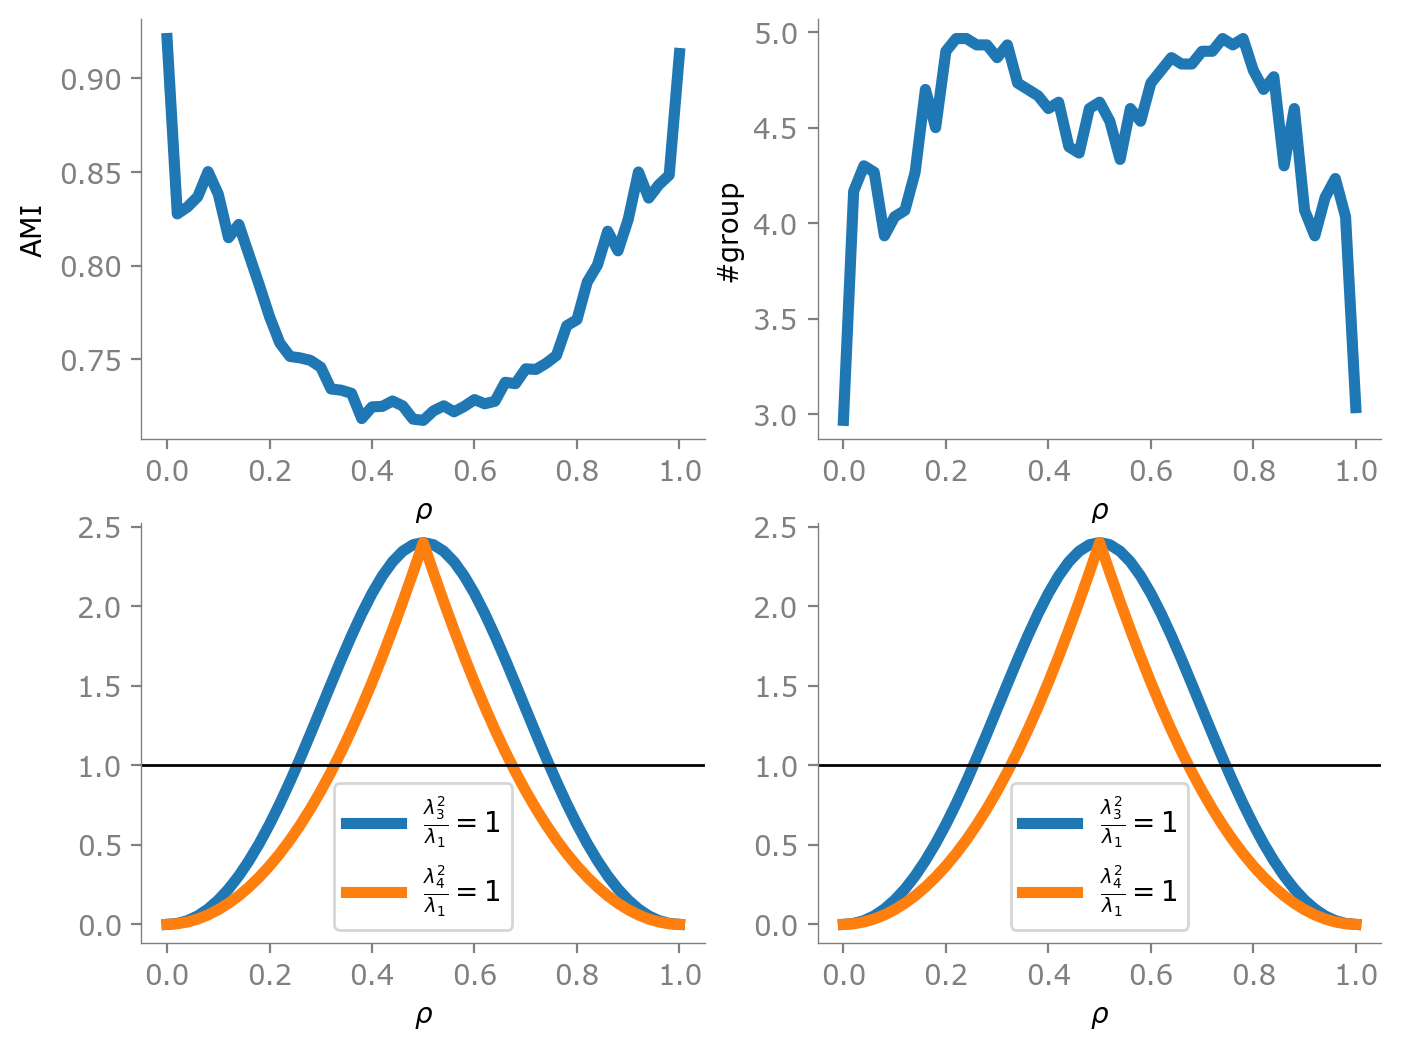

In [8]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(8, 6))
widths = [4, 4]
heights = [3, 3]
spec5 = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.plot(plot_rhos, sub_ami)
# plt.axvline(1, color='k', lw=1)
plt.xlabel(r"$\rho$")
plt.ylabel("AMI")

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
plt.plot(plot_rhos, sub_num_group)
# plt.axvline(1, color='k', lw=1)
plt.xlabel(r"$\rho$")
plt.ylabel("#group")

row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.plot(plot_rhos, lambdas[:, 2]**2/lambdas[:, 0], label=r'$\frac{\lambda_3^2}{\lambda_1}=1$')
plt.plot(plot_rhos, lambdas[:, 3]**2/lambdas[:, 0], label=r'$\frac{\lambda_4^2}{\lambda_1}=1$')
plt.axhline(1, color='k', lw=1)
plt.xlabel(r"$\rho$")
plt.legend()

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
plt.plot(plot_rhos, lambdas[:, 2]**2/lambdas[:, 0], label=r'$\frac{\lambda_3^2}{\lambda_1}=1$')
plt.plot(plot_rhos, lambdas[:, 3]**2/lambdas[:, 0], label=r'$\frac{\lambda_4^2}{\lambda_1}=1$')
plt.axhline(1, color='k', lw=1)
plt.xlabel(r"$\rho$")
plt.legend()

In [9]:
print(np.min(sub_num_group))

2.966666666666667


# BP rho=0.5 n=10000 d=16

In [22]:
# For big n
n = 10000
d = 16
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
givenTrueEpsilon = True
writeCM = True
learnqby = 'FE'
fileID = 'amiExp24.4.21' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_learnqby{"MDL" if learnqby == "MDL" else "FE"}_'\
                              f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}'\
                              f'1exp20learn1rho_recordf'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

{0.00099: 2.0, 0.00118: 2.0, 0.00136: 3.0, 0.00154: 2.0, 0.00173: 4.0, 0.00191: 4.0, 0.0021: 5.0, 0.00228: 6.0, 0.00246: 4.0, 0.00265: 4.0, 0.00283: 4.0, 0.00302: 5.0, 0.0032: 5.0}


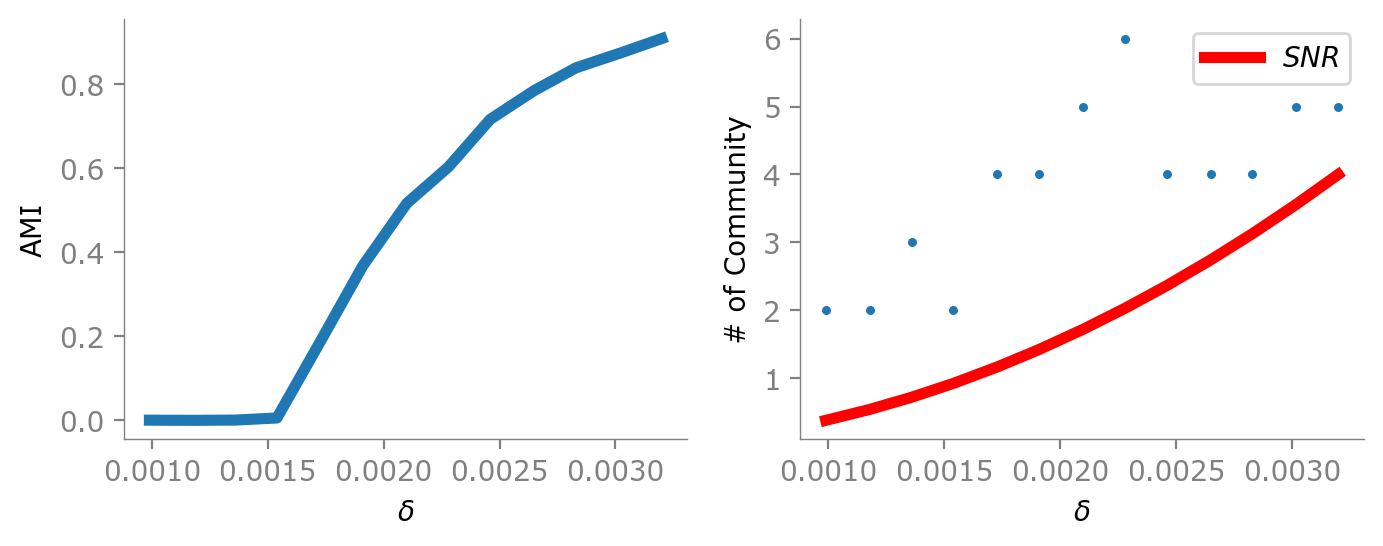

In [54]:
fig = plt.figure(figsize=(8, 6))
widths = [4, 4]
heights = [3, 3]
spec5 = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.plot(plot_zs, sub_ami)
# plt.axvline(1, color='k', lw=1)
plt.xlabel(r"$\delta$")
plt.ylabel("AMI")

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
plt.scatter(plot_zs, sub_num_group, s=5)
# plt.axvline(1, color='k', lw=1)
plt.xlabel(r"$\delta$")
plt.ylabel("# of Community")
plt.plot(plot_zs, lambdas[:, 1]**2/lambdas[:, 0], '-r', label=r'$SNR$')
plt.legend()
print(dict(zip(plot_zs, sub_num_group)))
# print(sub_num_group)

In [48]:
def observe_f(filepath):
    results = []
    with open(filepath, 'r') as fr:
        for line in fr.readlines():
            line = line.strip().split(" ")
            if line[0] == 'Finial':
                break
            result_line = []
            for datastr in line:
                # print(datastr)
                result_line.append(float(datastr.split("=")[1]))
            results.append(result_line)
    results = np.array(results)
    fig = plt.figure(figsize=(8, 6))
    widths = [4, 4]
    heights = [3, 3]
    spec5 = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
    row = 0
    col = 0
    ax = fig.add_subplot(spec5[row, col])
    plt.scatter(results[:, 0], results[:, 2], s=5)
    x = np.sort(np.unique(results[:, 0]))
    y = []
    for xi in x:
        y.append(np.min(results[np.argwhere(results[:, 0]==xi)[:, 0], :][:, 3]))
    print(f'q={x}, min_f={y}')
    plt.plot(x, y, '-r', lw=1)
    plt.xlabel(r"$q$")
    plt.ylabel(r"Free Energy")
    fileName = filepath.split('/')[4]
    plt.title(fileName.split("0.5")[1].split('t=0')[0])
    
    cm_file = f'./result/confusionMatrix/{fileName.split("_BPlearnq_")[0]}.txt'
    print('Confusion Matrix of Final Partition:')
    with open(cm_file, 'r') as fr:
        for line in fr.readlines():
            line = line.strip().replace('[', '').replace(']', '')
            print(line)
            

q=[1. 2. 3. 4. 5. 6. 7.], min_f=[-14.1149, -14.2571, -14.4403, -14.5952, -14.5954, -14.5945, -14.5945]
Confusion Matrix of Final Partition:
2299.   58.   53.   64.
  54. 2357.   71.   29.
  61.   50. 2225.   49.
  39.   32.   52. 2404.


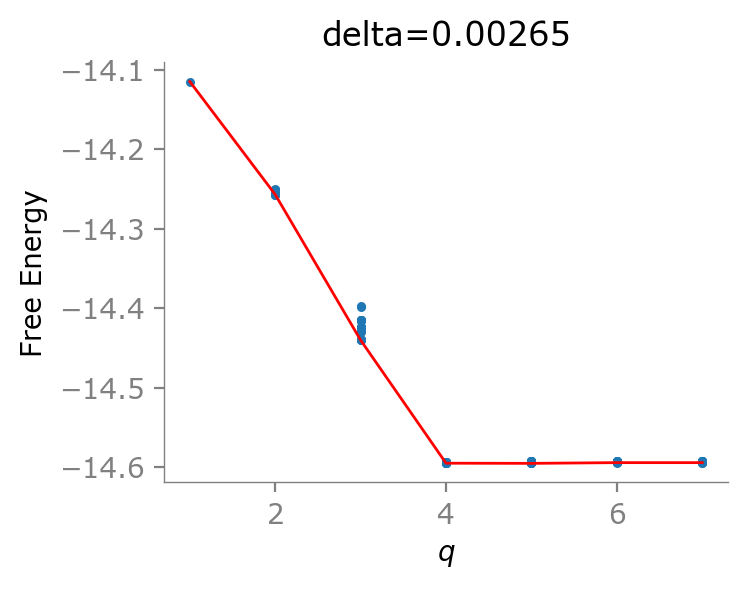

In [69]:
# fileName = "n=10000d=16Zs=2Zb=2rho=0.5delta=0.00099t=0__BP_FE_TrueEpsilon_moreq_BPlearnq_FreeEnergy_90848SUB_inite0.577375.txt"
# fileName = "n=10000d=16Zs=2Zb=2rho=0.5delta=0.00118t=0__BP_FE_TrueEpsilon_moreq_BPlearnq_FreeEnergy_90849SUB_inite0.525151.txt"
# fileName = "n=10000d=16Zs=2Zb=2rho=0.5delta=0.00136t=0__BP_FE_TrueEpsilon_moreq_BPlearnq_FreeEnergy_90850SUB_inite0.480916.txt"
# fileName = "n=10000d=16Zs=2Zb=2rho=0.5delta=0.00154t=0__BP_FE_TrueEpsilon_moreq_BPlearnq_FreeEnergy_90851SUB_inite0.441016.txt"  # SNR<1
# fileName = "n=10000d=16Zs=2Zb=2rho=0.5delta=0.00173t=0__BP_FE_TrueEpsilon_moreq_BPlearnq_FreeEnergy_90852SUB_inite0.402934.txt"  # SNR>1
# fileName = "n=10000d=16Zs=2Zb=2rho=0.5delta=0.00191t=0__BP_FE_TrueEpsilon_moreq_BPlearnq_FreeEnergy_90853SUB_inite0.370157.txt"
# fileName = "n=10000d=16Zs=2Zb=2rho=0.5delta=0.0021t=0__BP_FE_TrueEpsilon_moreq_BPlearnq_FreeEnergy_90854SUB_inite0.338583.txt"  # q_minf=5, 
# fileName = "n=10000d=16Zs=2Zb=2rho=0.5delta=0.00228t=0__BP_FE_TrueEpsilon_moreq_BPlearnq_FreeEnergy_90855SUB_inite0.311178.txt"  # q_minf=6
# fileName = "n=10000d=16Zs=2Zb=2rho=0.5delta=0.00246t=0__BP_FE_TrueEpsilon_moreq_BPlearnq_FreeEnergy_90849SUB_inite0.285922.txt"
fileName = "n=10000d=16Zs=2Zb=2rho=0.5delta=0.00265t=0__BP_FE_TrueEpsilon_moreq_BPlearnq_FreeEnergy_90848SUB_inite0.261324.txt" # q_minf=5 but result have 4 partition
# fileName = "n=10000d=16Zs=2Zb=2rho=0.5delta=0.00283t=0__BP_FE_TrueEpsilon_moreq_BPlearnq_FreeEnergy_90850SUB_inite0.239758.txt"
# fileName = "n=10000d=16Zs=2Zb=2rho=0.5delta=0.00302t=0__BP_FE_TrueEpsilon_moreq_BPlearnq_FreeEnergy_90851SUB_inite0.218629.txt" # q_minf=6 but result have 5 partition
# fileName = "n=10000d=16Zs=2Zb=2rho=0.5delta=0.0032t=0__BP_FE_TrueEpsilon_moreq_BPlearnq_FreeEnergy_90855SUB_inite0.2.txt"  # q_minf=5
observe_f("./other/mode_net/record_f/" + fileName)